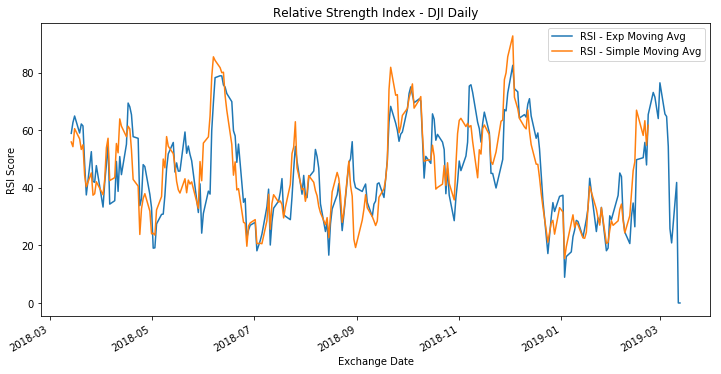

In [5]:
# THIS CELL RUNS FOR THE DJI DAILY FILE

import pandas
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Window length for RSI
window_length = 14

#Geeting the dataset
dji = pd.DataFrame()
dji = pd.read_excel("{}.xlsx".format('DJI-daily'), skiprows=22,usecols=[0, 1],index_col=0)
dji['ROI'] = dji['Close'] / dji['Close'].shift(periods=-1) - 1

# Adjusted closing price of the stock
close = dji['Close']

# Get the ROI 
roi = close.diff()
roi = roi[1:] 

# Separate positive and negative ROI values
positive_dji = roi.copy()
negative_dji = roi.copy()
positive_dji[positive_dji < 0] = 0
negative_dji[negative_dji > 0] = 0

# Calculate the Exponential Moving Average on positive and negative ROI
ewm_positive = positive_dji.ewm(span = window_length).mean()
ewm_negative = (negative_dji.abs()).ewm(span = window_length).mean()

# Calculate the RSI based on  Exponential Moving Average
ewm_RSI = ewm_positive / ewm_negative
ewm_rsi_score = 100.0 - (100.0 / (1.0 + ewm_RSI))

# Calculate the Simple Moving Average on positive and negative ROI
sma_positive = positive_dji.rolling(window=window_length).mean()
sma_negative = (negative_dji.abs()).rolling(window=window_length).mean()

# Calculate the RSI based on Simple Moving Average
sma_RSI = sma_positive / sma_negative
sma_rsi_score = 100.0 - (100.0 / (1.0 + sma_RSI))

# Compare graphically
%matplotlib inline
plt.figure()
ewm_rsi_score.plot(figsize=(12,6))
sma_rsi_score.plot(figsize=(12,6))
plt.legend(['RSI - Exp Moving Avg', 'RSI - Simple Moving Avg'])
plt.title('Relative Strength Index - DJI Daily')
plt.ylabel('RSI Score')
plt.show()

# Sellsignal, Buysignal calculations based on EWM RSI only
dji['Sell_calc'] = ewm_rsi_score - 70
dji['Buy_calc'] = ewm_rsi_score - 30
dji['Sellsignal'] = 0
dji['Buysignal'] = 0


for i in range(0, len(dji)):
    if (dji['Sell_calc'].iloc[i] < 0):
        if (dji['Sell_calc'].iloc[i-1] > 0):
            if (dji['Sell_calc'].iloc[i-2] > 0):
                if (dji['Sell_calc'].iloc[i-3] > 0):
                    if (dji['Sell_calc'].iloc[i-4] > 0):  
                        if (dji['Sell_calc'].iloc[i-5] > 0): 
                            dji['Sellsignal'].iloc[i] = 1


for i in range(0, len(dji)):
    if (dji['Sellsignal'].iloc[i] != 1):
        dji['Sellsignal'].iloc[i] = 0

for i in range(0, len(dji)):
    if (dji['Buy_calc'].iloc[i] > 0):
        if (dji['Buy_calc'].iloc[i-1] < 0):
            if (dji['Buy_calc'].iloc[i-2] < 0):
                if (dji['Buy_calc'].iloc[i-3] < 0):
                    if (dji['Buy_calc'].iloc[i-4] < 0):  
                        if (dji['Buy_calc'].iloc[i-5] < 0):  
                            dji['Buysignal'].iloc[i] = 1


for i in range(0, len(dji)):
    if (dji['Buysignal'].iloc[i] != 1):
        dji['Buysignal'].iloc[i] = 0

dji.to_csv('dji_test.csv')

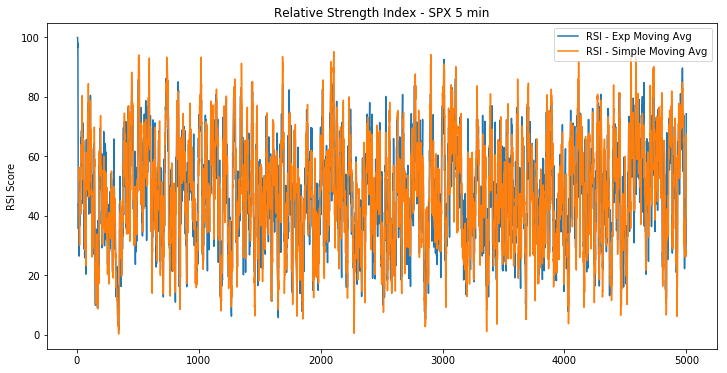

KeyboardInterrupt: 

In [7]:
# THIS CELL RUNS FOR THE SPX 5 MIN FILE

import pandas
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Window length for RSI
window_length = 14

#Geeting the dataset
spx = pd.DataFrame()
spx = pd.read_excel("{}.xlsx".format('SPX-5min'), skiprows=13,usecols=[2])
spx['Close'] = spx
spx['ROI'] = spx['Close'] / spx['Close'].shift(periods=-1) - 1

# Adjusted closing price of the stock
close = spx['Close']

# Get the ROI 
roi = close.diff()
roi = roi[1:] 

# Separate positive and negative ROI values
positive_spx = roi.copy()
negative_spx = roi.copy()
positive_spx[positive_spx < 0] = 0
negative_spx[negative_spx > 0] = 0

# Calculate the Exponential Moving Average on positive and negative ROI
ewm_positive = positive_spx.ewm(span = window_length).mean()
ewm_negative = (negative_spx.abs()).ewm(span = window_length).mean()

# Calculate the RSI based on  Exponential Moving Average
ewm_RSI = ewm_positive / ewm_negative
ewm_rsi_score = 100.0 - (100.0 / (1.0 + ewm_RSI))

# Calculate the Simple Moving Average on positive and negative ROI
sma_positive = positive_spx.rolling(window=window_length).mean()
sma_negative = (negative_spx.abs()).rolling(window=window_length).mean()

# Calculate the RSI based on Simple Moving Average
sma_RSI = sma_positive / sma_negative
sma_rsi_score = 100.0 - (100.0 / (1.0 + sma_RSI))

# Compare graphically
%matplotlib inline
plt.figure()
ewm_rsi_score.plot(figsize=(12,6))
sma_rsi_score.plot(figsize=(12,6))
plt.legend(['RSI - Exp Moving Avg', 'RSI - Simple Moving Avg'])
plt.title('Relative Strength Index - SPX 5 min')
plt.ylabel('RSI Score')
plt.show()

# Sellsignal, Buysignal calculations based on EWM RSI only
spx['Sell_calc'] = ewm_rsi_score - 70
spx['Buy_calc'] = ewm_rsi_score - 30
spx['Sellsignal'] = 0
spx['Buysignal'] = 0


for i in range(0, len(spx)):
    if (spx['Sell_calc'].iloc[i] < 0):
        if (spx['Sell_calc'].iloc[i-1] > 0):
            if (spx['Sell_calc'].iloc[i-2] > 0):
                if (spx['Sell_calc'].iloc[i-3] > 0):
                    if (spx['Sell_calc'].iloc[i-4] > 0):  
                        if (spx['Sell_calc'].iloc[i-5] > 0): 
                            spx['Sellsignal'].iloc[i] = 1


for i in range(0, len(spx)):
    if (spx['Sellsignal'].iloc[i] != 1):
        spx['Sellsignal'].iloc[i] = 0

for i in range(0, len(spx)):
    if (spx['Buy_calc'].iloc[i] > 0):
        if (spx['Buy_calc'].iloc[i-1] < 0):
            if (spx['Buy_calc'].iloc[i-2] < 0):
                if (spx['Buy_calc'].iloc[i-3] < 0):
                    if (spx['Buy_calc'].iloc[i-4] < 0):  
                        if (spx['Buy_calc'].iloc[i-5] < 0):  
                            spx['Buysignal'].iloc[i] = 1


for i in range(0, len(spx)):
    if (spx['Buysignal'].iloc[i] != 1):
        spx['Buysignal'].iloc[i] = 0

spx.to_csv('spx_test.csv')

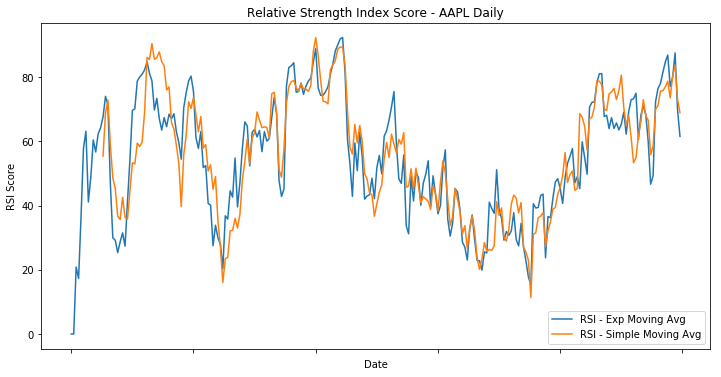

In [8]:
# THIS CELL RUNS FOR THE AAPL DAILY FILE

import pandas
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Window length for RSI
window_length = 14

#Geeting the dataset
appl = pd.DataFrame()
appl = pd.read_csv("AAPL.csv", usecols=[0, 5],index_col=0)
appl['Close'] = appl
appl['ROI'] = appl['Close'] / appl['Close'].shift(periods=-1) - 1

# Adjusted closing price of the stock
close = appl['Close']

# Get the ROI 
roi = close.diff()
roi = roi[1:] 

# Separate positive and negative ROI values
positive_appl = roi.copy()
negative_appl = roi.copy()
positive_appl[positive_appl < 0] = 0
negative_appl[negative_appl > 0] = 0

# Calculate the Exponential Moving Average on positive and negative ROI
ewm_positive = positive_appl.ewm(span = window_length).mean()
ewm_negative = (negative_appl.abs()).ewm(span = window_length).mean()

# Calculate the RSI based on  Exponential Moving Average
ewm_RSI = ewm_positive / ewm_negative
ewm_rsi_score = 100.0 - (100.0 / (1.0 + ewm_RSI))

# Calculate the Simple Moving Average on positive and negative ROI
sma_positive = positive_appl.rolling(window=window_length).mean()
sma_negative = (negative_appl.abs()).rolling(window=window_length).mean()

# Calculate the RSI based on Simple Moving Average
sma_RSI = sma_positive / sma_negative
sma_rsi_score = 100.0 - (100.0 / (1.0 + sma_RSI))

# Compare graphically
%matplotlib inline
plt.figure()
ewm_rsi_score.plot(figsize=(12,6))
sma_rsi_score.plot(figsize=(12,6))
plt.legend(['RSI - Exp Moving Avg', 'RSI - Simple Moving Avg'])
plt.title('Relative Strength Index Score - AAPL Daily')
plt.ylabel('RSI Score')
plt.show()

# Sellsignal, Buysignal calculations based on EWM RSI only
appl['Sell_calc'] = ewm_rsi_score - 70
appl['Buy_calc'] = ewm_rsi_score - 30
appl['Sellsignal'] = 0
appl['Buysignal'] = 0


for i in range(0, len(appl)):
    if (appl['Sell_calc'].iloc[i] < 0):
        if (appl['Sell_calc'].iloc[i-1] > 0):
            if (appl['Sell_calc'].iloc[i-2] > 0):
                if (appl['Sell_calc'].iloc[i-3] > 0):
                    if (appl['Sell_calc'].iloc[i-4] > 0):  
                        if (appl['Sell_calc'].iloc[i-5] > 0): 
                            appl['Sellsignal'].iloc[i] = 1


for i in range(0, len(appl)):
    if (appl['Sellsignal'].iloc[i] != 1):
        appl['Sellsignal'].iloc[i] = 0

for i in range(0, len(appl)):
    if (appl['Buy_calc'].iloc[i] > 0):
        if (appl['Buy_calc'].iloc[i-1] < 0):
            if (appl['Buy_calc'].iloc[i-2] < 0):
                if (appl['Buy_calc'].iloc[i-3] < 0):
                    if (appl['Buy_calc'].iloc[i-4] < 0):  
                        if (appl['Buy_calc'].iloc[i-5] < 0):  
                            appl['Buysignal'].iloc[i] = 1


for i in range(0, len(appl)):
    if (appl['Buysignal'].iloc[i] != 1):
        appl['Buysignal'].iloc[i] = 0

appl.to_csv('appl_test.csv')